<a href="https://colab.research.google.com/github/ANANDAPADMANABHA/test/blob/main/HeartdiceasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import warnings
warnings.filterwarnings('ignore')

Read file

In [24]:
df = pd.read_csv('heart.csv')

In [25]:
type(df)

pandas.core.frame.DataFrame

In [26]:
df.shape

(303, 14)

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
df['target'].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [29]:
df['target'].unique()

array([1, 0])

finding the corelation

In [30]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


1    165
0    138
Name: target, dtype: int64


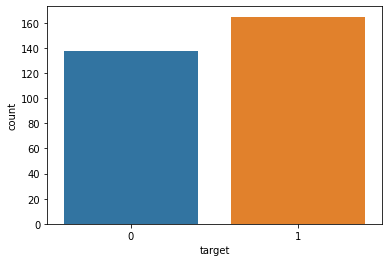

In [31]:
y = df['target']
sns.countplot(y)
target_temp = df.target.value_counts()
print(target_temp)

In [32]:
countNoDicease =len(df[df.target == 0])
countHaveDicease = len(df[df.target == 1])

In [33]:
countHaveDicease

165

In [34]:
countNoDicease

138

In [35]:
df['sex'].unique()

array([1, 0])

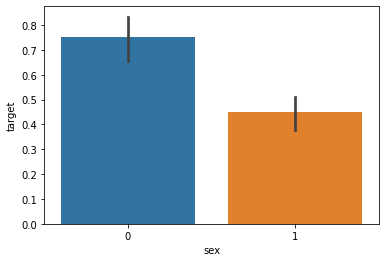

In [36]:
sns.barplot(df['sex'],y)

In [37]:
df['cp'].unique()

array([3, 2, 1, 0])

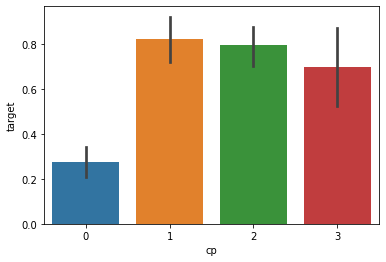

In [38]:
sns.barplot(df['cp'],y)

In [39]:
df['fbs'].unique()

array([1, 0])

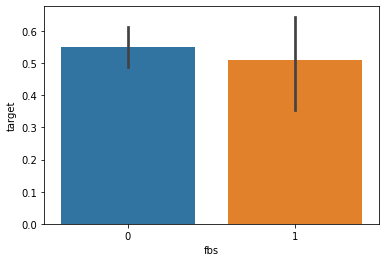

In [40]:
sns.barplot(df['fbs'],y)

In [41]:
df['restecg'].unique()

array([0, 1, 2])

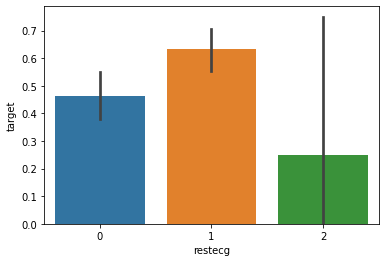

In [42]:
sns.barplot(df['restecg'],y)

In [43]:
df['exang'].unique()

array([0, 1])

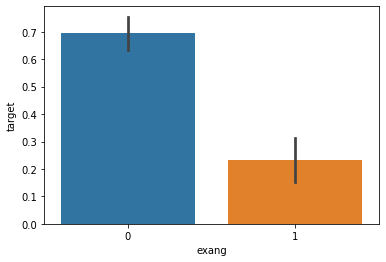

In [44]:
sns.barplot(df['exang'],y)

In [45]:
df['slope'].unique()

array([0, 2, 1])

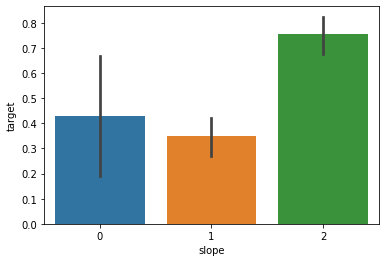

In [46]:
sns.barplot(df['slope'],y)

In [47]:
df['ca'].unique()

array([0, 2, 1, 3, 4])

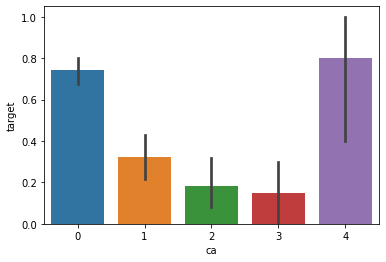

In [48]:
sns.barplot(df['ca'],y)

In [49]:
df['thal'].unique()

array([1, 2, 3, 0])

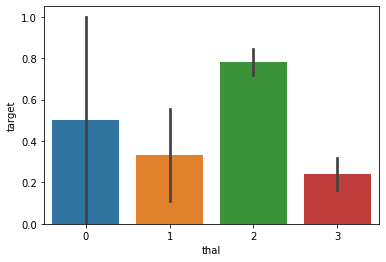

In [50]:
sns.barplot(df['thal'],y)

Splitting the data

In [51]:
from sklearn.model_selection import train_test_split

predictors = df.drop('target',axis=1)
target = df['target']

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size = 0.20 ,random_state =0)

In [52]:
X_train.shape

(242, 13)

In [53]:
X_test.shape

(61, 13)

In [54]:
from sklearn.metrics import accuracy_score

Logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [57]:
Y_pred_lr.shape

(61,)

In [58]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr))


The accuracy score achieved using Logistic Regression is: 85.25


Naive bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [60]:
Y_pred_nb.shape


(61,)

In [61]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")


The accuracy score achieved using Naive Bayes is: 85.25 %


Support Vector Machine

In [62]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape

(61,)

In [63]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")


The accuracy score achieved using Linear SVM is: 81.97 %


KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)


In [67]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        


rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf


array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [69]:
print(max_accuracy)
print(best_x)

90.16
323


In [70]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 86.89 %


In [71]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")


The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 86.89 %


**Plotting the accuracy score on all algorithms**

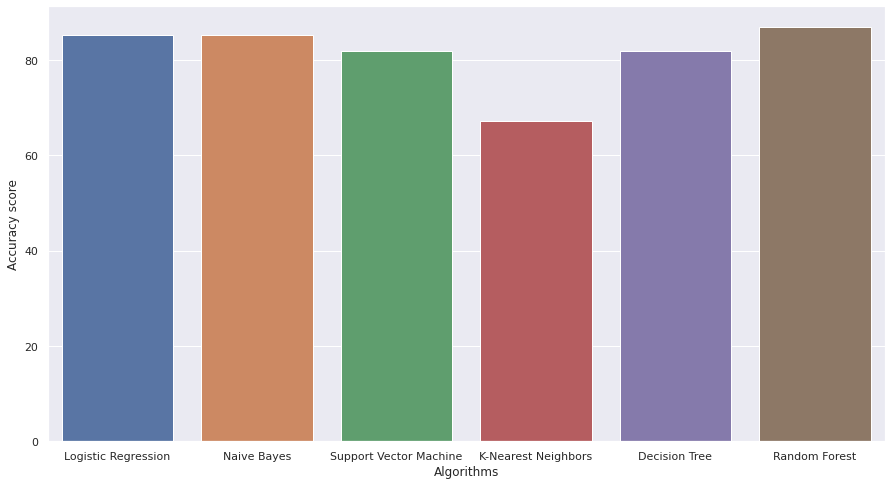

In [72]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)